In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from load_data import load_data

In [2]:
df = load_data()

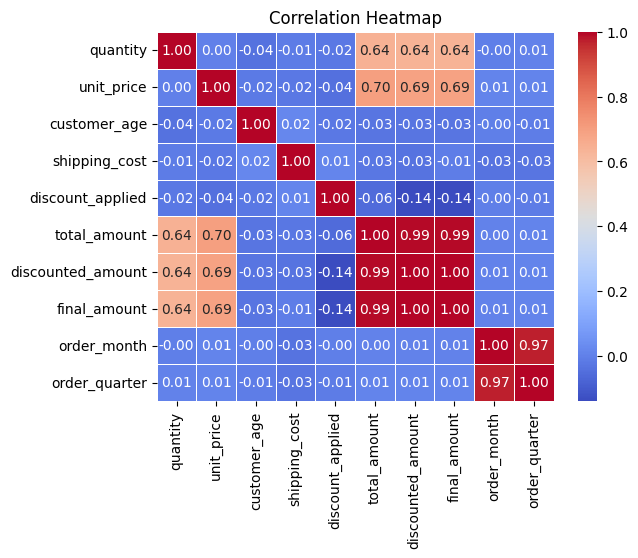

In [ ]:
# Generate a heatmap visualization of correlations
numerical_variables = df.select_dtypes(include=np.number)
sns.heatmap(data=numerical_variables.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Perform outlier detection for order values using IQR method
Q1 = df['final_amount'].quantile(0.25)
Q3 = df['final_amount'].quantile(0.75)
IQR = Q3-Q1

lower_bound= Q1 - 1.5*IQR
upper_bound = Q3 - 1.5* IQR

outliers = df[(df['final_amount']>= lower_bound)& (df['final_amount']<= upper_bound)]

print(f'number of outliers :{len(outliers)}')
print(f"Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")

number of outliers :0
Limites: [-372.71, -38.71]


<Axes: xlabel='shipping_cost', ylabel='final_amount'>

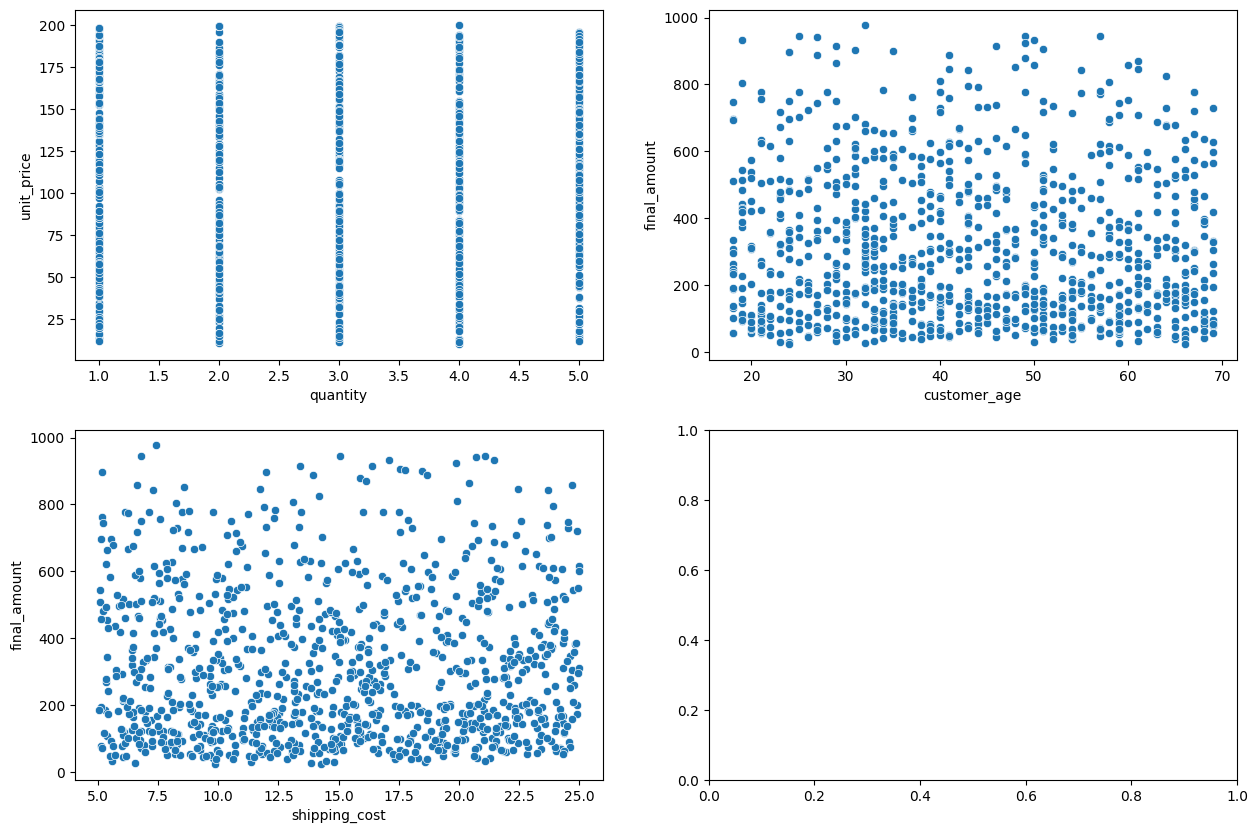

In [ ]:
# scatter plots showing relationships ...
fig , axes = plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(data=df, x='quantity', y='unit_price', ax=axes[0,0])
sns.scatterplot(data=df, x='customer_age', y='final_amount', ax=axes[0,1])
sns.scatterplot(data=df, x='shipping_cost', y='final_amount', ax=axes[1,0])

In [ ]:
# Calculate coefficient of variation for order values by category
coefficient_variation = df.groupby('product_category')['final_amount'].agg(['mean', 'std'])
coefficient_variation['coef_var']=coefficient_variation['std']/coefficient_variation['mean']
coefficient_variation

,mean,std,coef_var
product_category,,,
Books,314.989352,217.955578,0.691946
Clothing,311.617128,224.881776,0.721661
Electronics,299.314926,223.054633,0.745217
Home & Garden,314.564002,217.624893,0.691830
Sports,329.688415,229.758724,0.696897


In [ ]:
# Identify statistical significance of regional differences
from scipy import stats

# ANOVA test pour comparer les moyennes entre régions
regions = df.groupby('customer_region')['final_amount'].apply(list)
f_stat, p_value = stats.f_oneway(*regions)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

F-statistic: 1.6878
P-value: 0.1680
Significant: No
